UAS Computer Vision

Nama: Mario

NIM: 2440016905

Kelas: LA08 - LEC

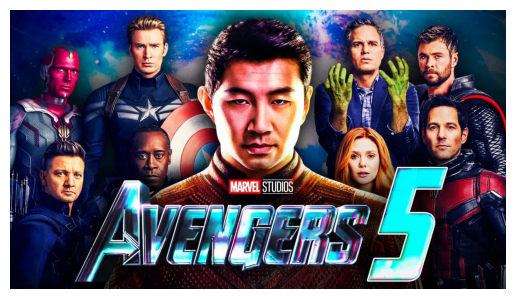

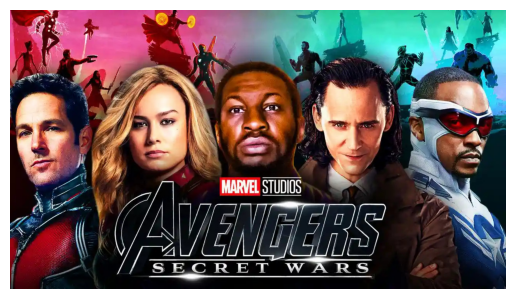

In [1]:
# Mengimport library yang perlu digunakan untuk algoritma pendeteksi wajah dan untuk tampilan hasil gambar
import cv2
import matplotlib.pyplot as plt

# Membaca dan menyimpan semua file gambar kedalam sebuah array
arrayGambar = [cv2.imread('avengers-5-characters-shang-chi_1.jpg'), cv2.imread('delay-mcu.jpg')]

# Untuk setiap gambar, lakukan beberapa proeses-proeses berikut
for gambar in arrayGambar:

    # Mengubah format warna dari BGR (yang digunakan oleh OpenCV) ke RGB (yang digunakan oleh matplotlib)
    tampilanGambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar-gambar yang diberikan oleh soal
    plt.imshow(tampilanGambar)
    plt.axis("off")
    plt.show()

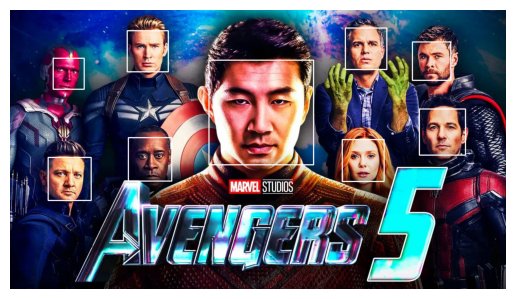

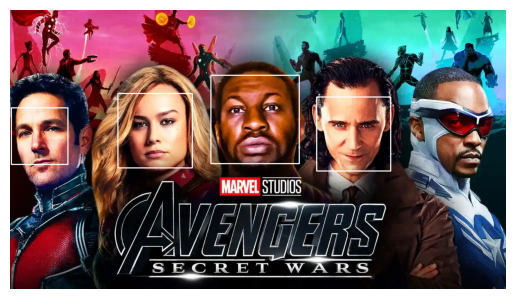

In [2]:
# Membaca dan menyimpan semua file gambar kedalam sebuah array
arrayGambar = [cv2.imread('avengers-5-characters-shang-chi_1.jpg'), cv2.imread('delay-mcu.jpg')]

# Menggunakan file eksternal tambahan untuk membantu proses deteksi wajah
pendeteksiMuka = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Untuk setiap gambar, lakukan beberapa proeses-proeses berikut
for gambar in arrayGambar:

    # Rubah format warna gambar dari BGR ke skala abu-abu
    gambarAbu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

    # Lakukan proses kompleks pendeteksi muka dengan beberapa parameter-parameter yang ditentukan
    muka = pendeteksiMuka.detectMultiScale(gambar, scaleFactor = 1.1, minNeighbors = 5, minSize = (50, 50))

    # Untuk setiap muka yang terdeteksi, lakukan berikut
    for (x_awal, y_awal, lebar, tinggi) in muka:

        # Menggambarkan kotak putih sekeliling area gambar yang dianggap memiliki sebuah muka karakter
        cv2.rectangle(gambar, (x_awal, y_awal), (x_awal + lebar, y_awal + tinggi), (255, 255, 255), 2)

    # Mengubah format warna dari BGR (yang digunakan oleh OpenCV) ke RGB (yang digunakan oleh matplotlib)
    tampilanGambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar setelah kotak-kotak putih telah ditambahkan
    plt.imshow(tampilanGambar)
    plt.axis("off")
    plt.show()

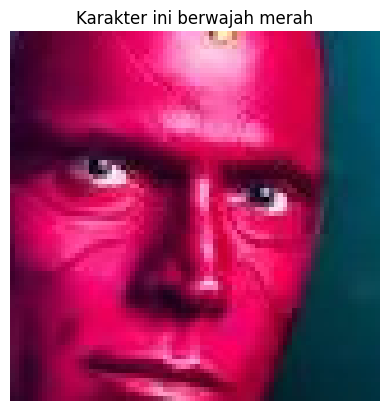

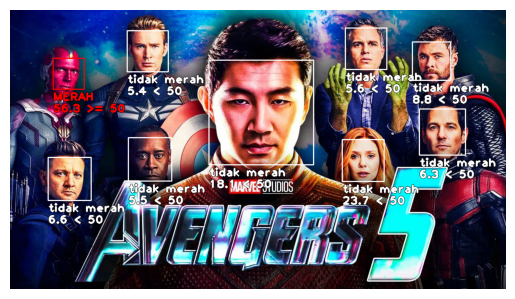

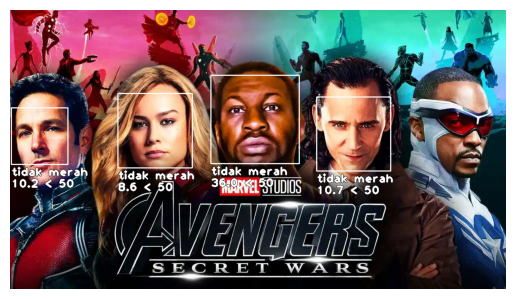

In [3]:
# Membaca dan menyimpan semua file gambar kedalam sebuah array
# Ini dilakukan lagi agar kita tidak menggunakan gambar-gambar yang sudah ditambahkan dengan kotak-kotak
arrayGambar = [cv2.imread('avengers-5-characters-shang-chi_1.jpg'), cv2.imread('delay-mcu.jpg')]

# Untuk setiap gambar, lakukan beberapa proeses-proeses berikut
for gambar in arrayGambar:
    
    # Rubah format warna gambar dari BGR ke skala abu-abu
    gambarAbu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

    # Lakukan proses kompleks pendeteksi muka dengan beberapa parameter-parameter yang ditentukan
    muka = pendeteksiMuka.detectMultiScale(gambar, scaleFactor = 1.1, minNeighbors = 5, minSize = (50, 50))

    # Untuk setiap muka yang terdeteksi, lakukan berikut
    for (x_awal, y_awal, lebar, tinggi) in muka:

        # Inisialisasi variable 
        rataRataTingkatKemerahan = 0
        tingkatKemerahan = 0

        # Untuk setiap piksel dari sebuah kotak yang berisi sebuah muka
        for x in range(x_awal, x_awal+lebar):
            for y in range(y_awal, y_awal+tinggi):

                # Cek dan simpan jumlah warna biru, hijau, dan merah (masing-masing 0-255) dari sebuah piksel
                biru, hijau, merah = gambar[y, x]

                # Jika nilai merah lebih tinggi dari jumlah nilai hijau dan biru, lakukan berikut
                # (type casting "int" digunakan karena setiap variabel ini hanya menyimpan nilai 0 - 255, dan bisa terjadi overflow jika ini tidak dilakukan)
                if (int(merah) > int(hijau) + int(biru)):

                    # Tambahkan nilai tingkat kemerahan untuk muka ini berdasarkan perbedaan dari merah dengan jumlah hijau dan biru
                    tingkatKemerahan = tingkatKemerahan + (int(merah) - (int(hijau) + int(biru)))

        # Ambil rata-rata nilai tingkat kemerahan, membagi nilainya dengan jumlah piksel dari kotak wajah ini
        rataRataTingkatKemerahan = tingkatKemerahan / (lebar * tinggi)

        # Menentukan nilai ambang minimum
        nilaiAmbangMinimum = 50

        # Jika rata-rata nilai tingkat kemerahan memenuhi sebuah nilai ambang minimum, lakukan beikut
        if (rataRataTingkatKemerahan >= nilaiAmbangMinimum):

            # Setel warna kotak dan teks menjadi merah
            warnaKotakDanTeks = (0, 0, 255)

            # Siapkan teks yang menunjukkan sebuah muka dianggap merah, serta rata-rata nilai tingkat kemerahannya
            isiTeks1 = ("MERAH")
            isiTeks2 = ("{:.1f} >= {}".format(round(rataRataTingkatKemerahan, 1), nilaiAmbangMinimum))

            # Mengubah format warna dari BGR (yang digunakan oleh OpenCV) ke RGB (yang digunakan oleh matplotlib)
            tampilanGambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

            # Menampilkan muka dari karakter yang dianggap berwajah merah oleh program
            plt.imshow(tampilanGambar[y_awal : y_awal + tinggi, x_awal : x_awal + lebar])
            plt.title("Karakter ini berwajah merah")
            plt.axis("off")
            plt.show()

        # Jika rata-rata nilai tingkat kemerahan tidak memenuhi sebuah nilai ambang minimum, lakukan beikut
        else:

            # Setel warna kotak dan teks menjadi putih
            warnaKotakDanTeks = (255, 255, 255)

            # Siapkan teks yang menunjukkan sebuah muka tidak dianggap merah, serta rata-rata nilai tingkat kemerahannya
            isiTeks1 = ("tidak merah")
            isiTeks2 = ("{:.1f} < {}".format(round(rataRataTingkatKemerahan, 1), nilaiAmbangMinimum))

        # Tambahkan kotak dan teks untuk setiap wajah yang terdeksi di gambar, sesuai dengan setelan warna dan isi teks yang ditentukan sebelumnya
        # (Agar teks lebih mudah dibaca pada gambar, ada teks hitam yang lebih tebal (isi teksnya sama) di belakang teks putih / merah)
        cv2.rectangle(gambar, (x_awal, y_awal), (x_awal + lebar, y_awal + tinggi), warnaKotakDanTeks, 2)
        cv2.putText(gambar, isiTeks1, (x_awal, y_awal + tinggi + 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 0), 6)
        cv2.putText(gambar, isiTeks2, (x_awal, y_awal + tinggi + 60), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 0), 6)
        cv2.putText(gambar, isiTeks1, (x_awal, y_awal + tinggi + 30), cv2.FONT_HERSHEY_PLAIN, 2, warnaKotakDanTeks, 4)
        cv2.putText(gambar, isiTeks2, (x_awal, y_awal + tinggi + 60), cv2.FONT_HERSHEY_PLAIN, 2, warnaKotakDanTeks, 4)

    # Mengubah format warna dari BGR (yang digunakan oleh OpenCV) ke RGB (yang digunakan oleh matplotlib)
    tampilanGambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar setelah kotak-kotak putih telah ditambahkan
    plt.imshow(tampilanGambar)
    plt.axis("off")
    plt.show()